In [1]:
import sys
sys.path.insert(0, "/Users/oozguc/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook

In [2]:
targetdir = '/Users/oozguc/Desktop/cortexthickness_1x16_2x16_4x16'

Actinimage = '/Users/oozguc/Desktop/cortexthickness_1x16_2x16_4x16/Ch2Linescan_C2-1900408_2x16TrackID1.tif'

Membraneimage = '/Users/oozguc/Desktop/cortexthickness_1x16_2x16_4x16/Ch1Linescan_C2-1900408_2x16TrackID1.tif'


#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 10

#Symmetric psf as input (micrometers)
psf = 0.17
showaftertime = 100
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 80 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)


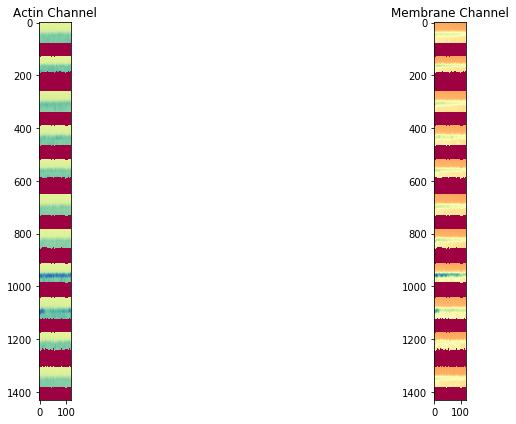

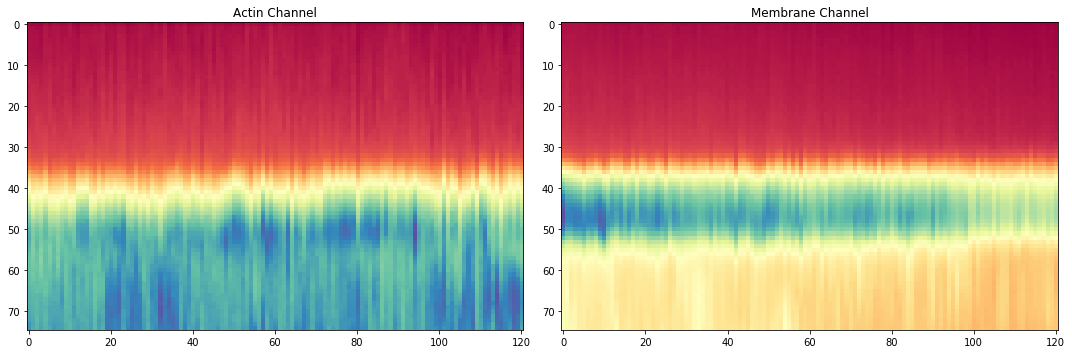

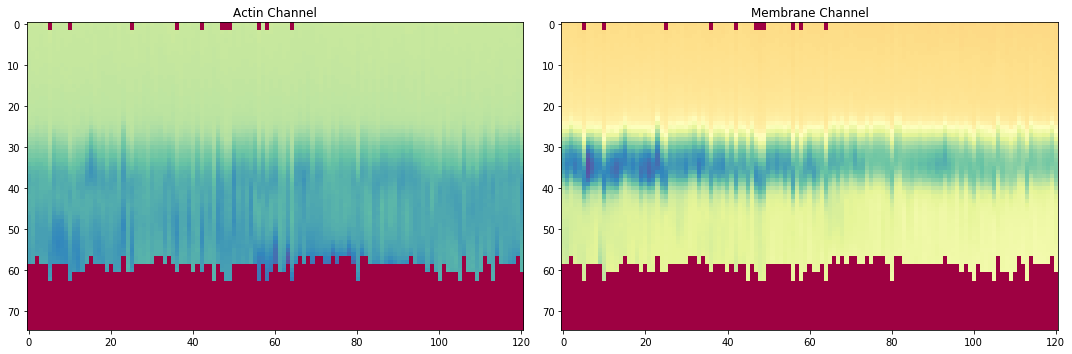

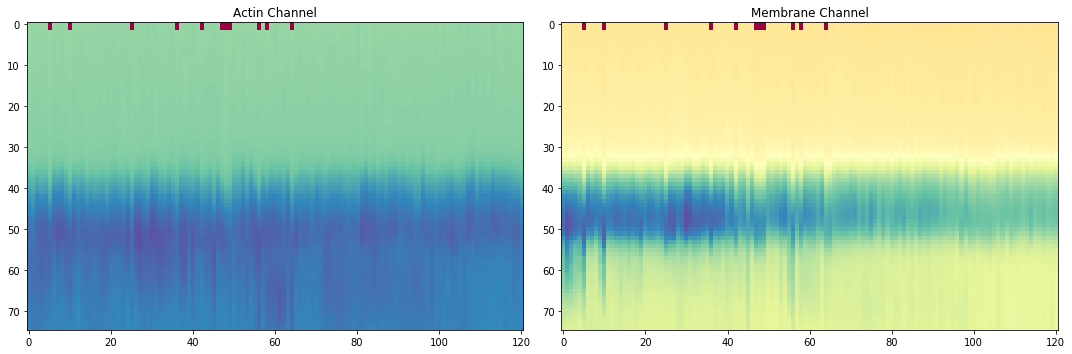

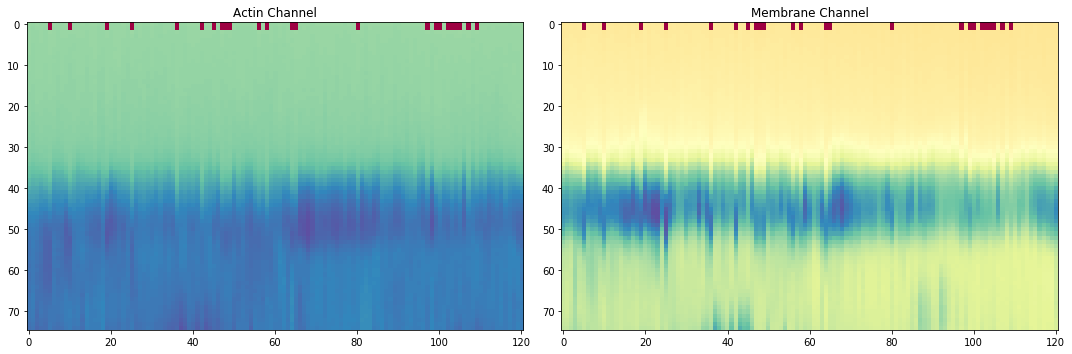

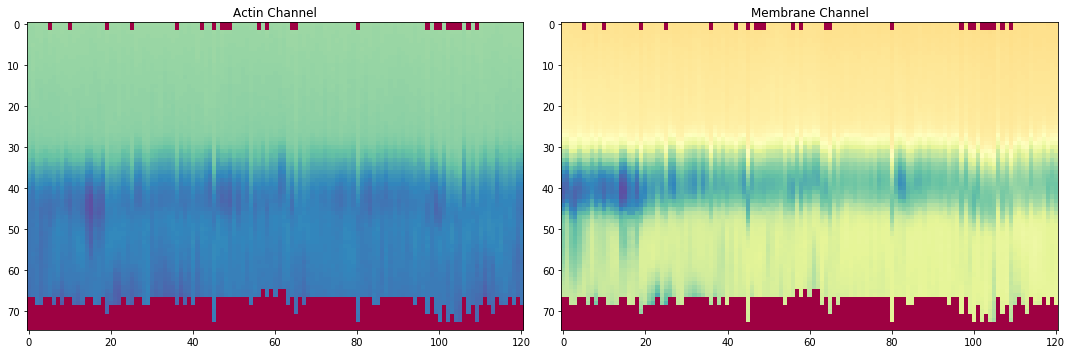

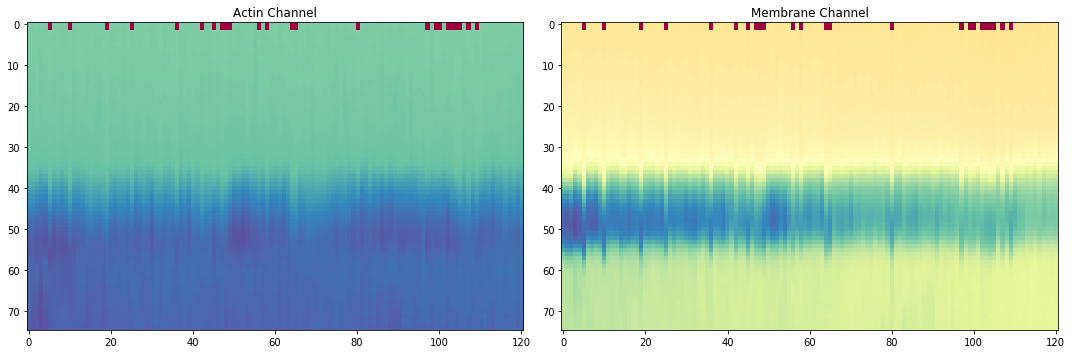

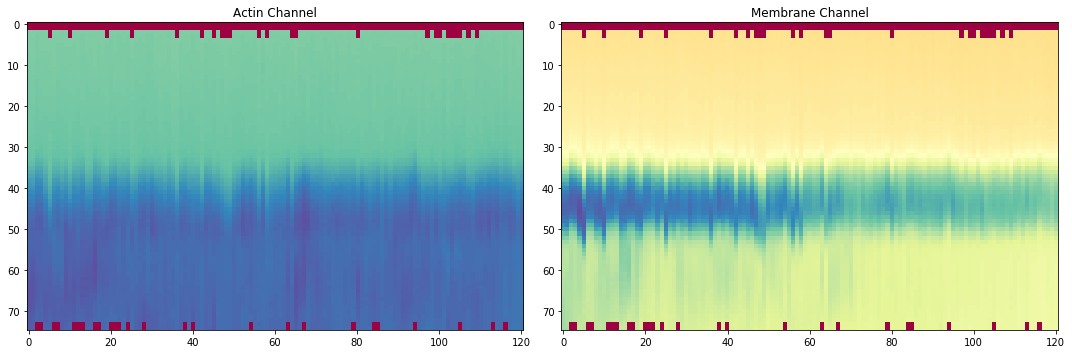

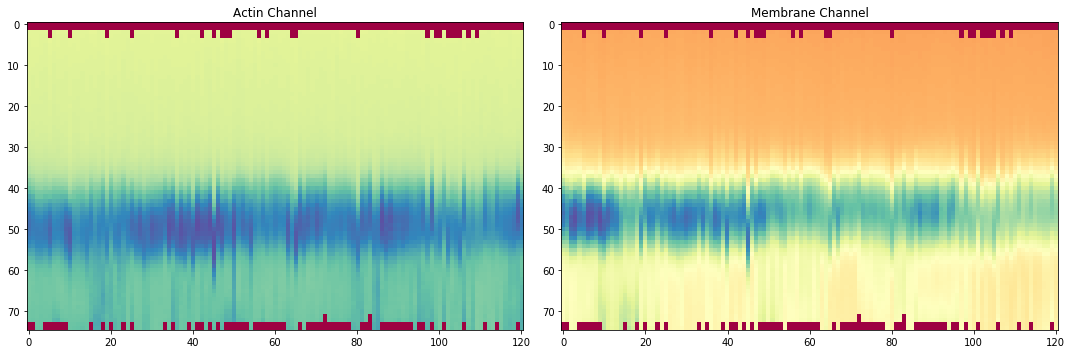

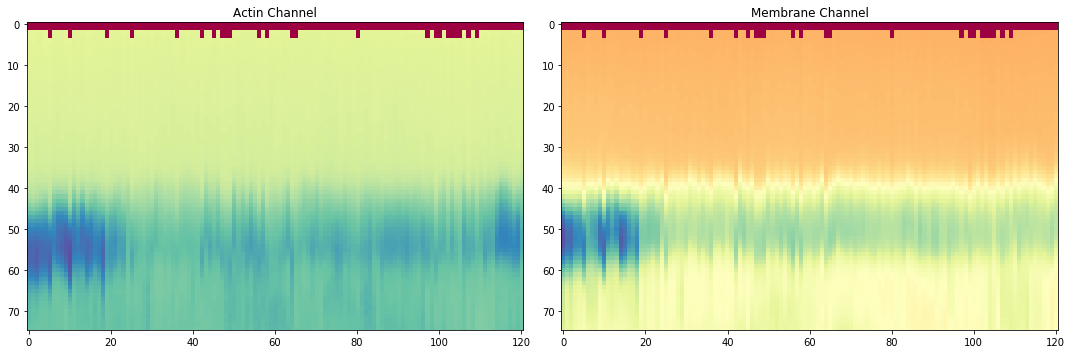

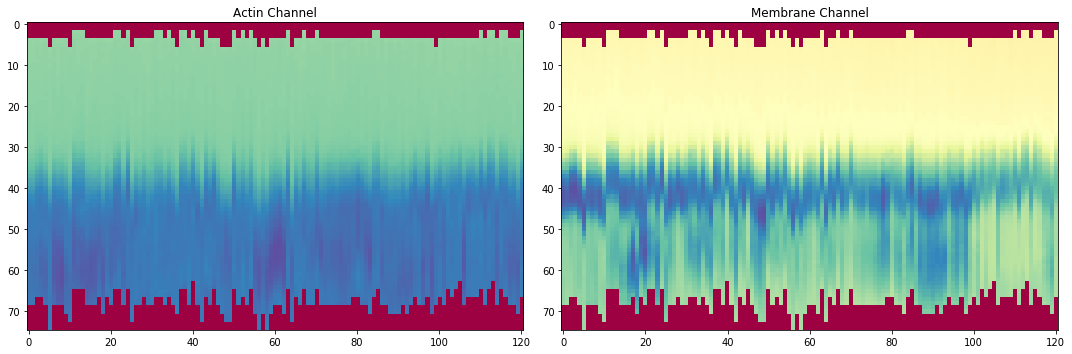

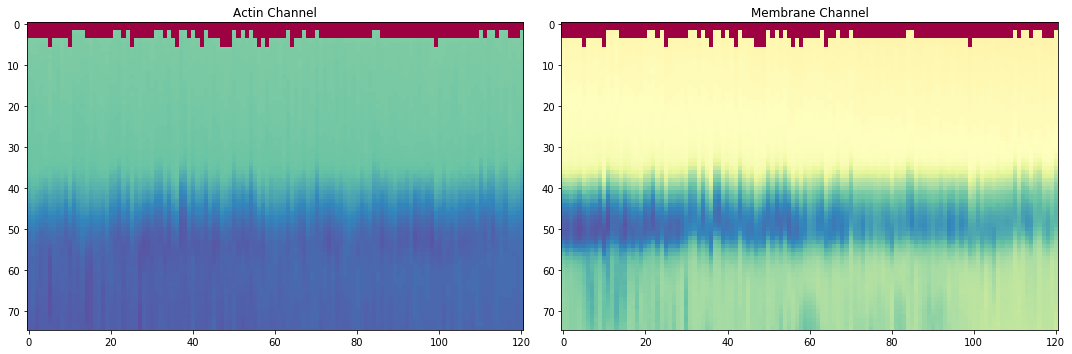

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock - 5,:]
   blockMembrane = Membrane[i:i + singleblock - 5,:]
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [527.10465076   1.08264347   4.74120254  61.73512844]
Actin Fit: [173.06714614   1.60661708   5.43612883  88.86926425]


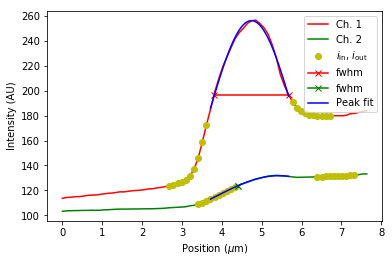

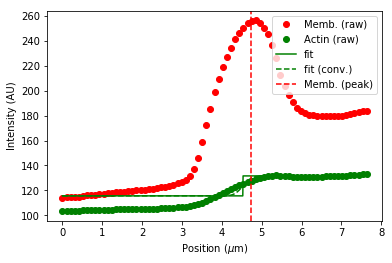

Thickness, center position of the cortical actin , cortical actin intensity (from fit) 0.21072789787844828 4.635838592159272 131.66608675380664
Thickness (min) 8.435059298618048 nm
Thickness (median) 55.317073234161846 nm
Thickness (max) 2413.7187097079254 nm
Ransac Slope =  -2.513e-05
Regression Slope =  4.265e-04
Mean Thickness (After outlier removal) =  0.061 um


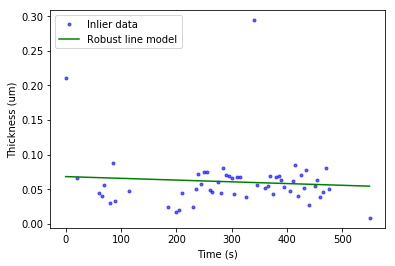

Loading BokehJS ...

block id 2


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Time point: 100
Membrane Fit: (Amp, Sigma, PeakPos, C) [167.70931277   0.65886989   3.76706566 124.80386214]
Actin Fit: [ 1.07080960e+06  2.78796425e+01  4.55730937e+00 -1.51867301e+04]


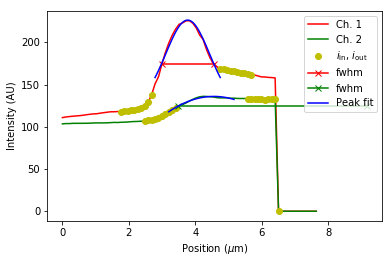

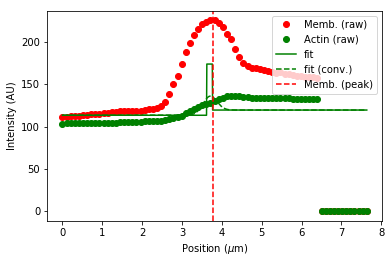

Thickness, center position of the cortical actin , cortical actin intensity (from fit) 0.1486121676866258 3.6927595768159427 173.77571710283
Thickness (min) 37.59316243626509 nm
Thickness (median) 173.00599917219634 nm
Thickness (max) 227.0031369998977 nm
Ransac Slope =  1.721e-05
Regression Slope =  1.721e-05
Mean Thickness (After outlier removal) =  0.160 um


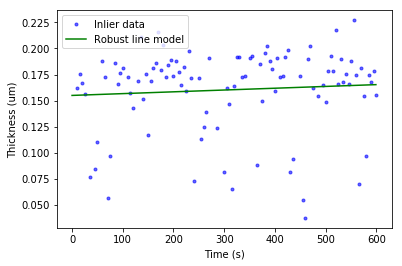

Loading BokehJS ...

block id 3
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [545.48203963   1.20152464   4.87284951  72.91219962]
Actin Fit: [126.10751043   1.34113754   5.38169214  96.46884025]


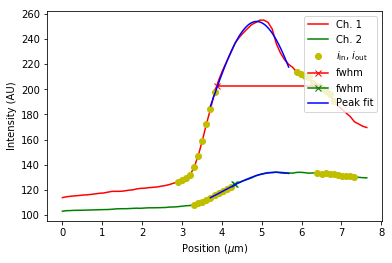

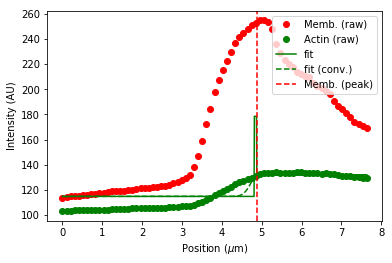

Thickness, center position of the cortical actin , cortical actin intensity (from fit) 0.0598659223637658 4.842916545894988 178.55590483888653
Time point: 100
Membrane Fit: (Amp, Sigma, PeakPos, C) [395.78999922   1.13334883   4.78872872  73.25731858]
Actin Fit: [126.56533994   1.26206798   5.25194895  95.1013872 ]


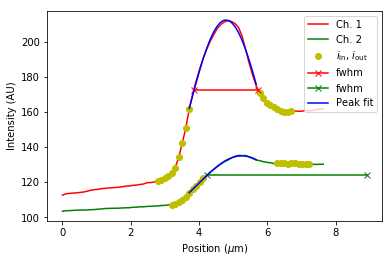

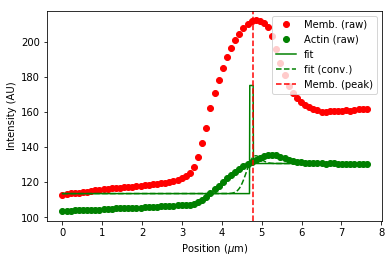

Thickness, center position of the cortical actin , cortical actin intensity (from fit) 0.08947713944258481 4.743990154576638 175.0678000960977
Thickness (min) 12.178222197605589 nm
Thickness (median) 90.16154514202407 nm
Thickness (max) 141.56850656690818 nm
Ransac Slope =  -2.967e-05
Regression Slope =  -2.967e-05
Mean Thickness (After outlier removal) =  0.087 um


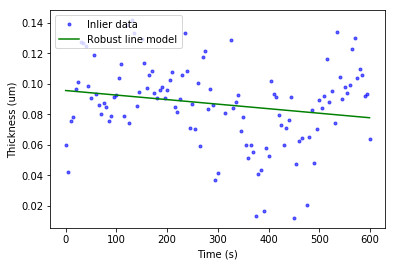

Loading BokehJS ...

block id 4
Time point: 0
Membrane Fit: (Amp, Sigma, PeakPos, C) [427.39802868   1.07944271   4.67761776  78.98075641]
Actin Fit: [183.69303372   1.65290074   5.55988771  89.68434511]


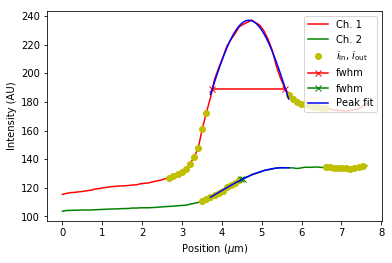

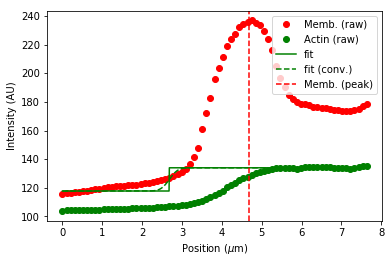

Thickness, center position of the cortical actin , cortical actin intensity (from fit) 1.995270246964464 3.679982640183141 133.9707668532114


In [ ]:
%%time
#Fit all blocks

for i in range(0, totallength):
 print('block id', i+1)   
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 PeakDiff, Thickness, Time = StripFit(Membrane, Actin, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime)
 

   
 
 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 Thickness_time = np.column_stack([Time, Thickness]) 
 Peak_time = np.column_stack([Time, PeakDiff]) 
 
 show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)
 

    

 hist, edges = np.histogram((Thickness), density=False, bins='auto')
 p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
 listedges = edges.tolist()
 listhist = hist.tolist()
 output_notebook()
 p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
 for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
 show(p)

